## import package

In [1]:
import sys
import numpy as np
import pandas as pd
import csv

## Read the Training Set

In [2]:
## EDA on training set
DATA_PATH = "./data/"
ENCODING = 'big5-hkscs'
train_set = pd.read_csv(DATA_PATH+"train.csv",encoding= ENCODING)
train_set.head(18)

,日期,測站,測項,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
0,2014/1/1,豐原,AMB_TEMP,14,14,14,13,12,12,12,...,22,22,21,19,17,16,15,15,15,15
1,2014/1/1,豐原,CH4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,...,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8
2,2014/1/1,豐原,CO,0.51,0.41,0.39,0.37,0.35,0.3,0.37,...,0.37,0.37,0.47,0.69,0.56,0.45,0.38,0.35,0.36,0.32
3,2014/1/1,豐原,NMHC,0.2,0.15,0.13,0.12,0.11,0.06,0.1,...,0.1,0.13,0.14,0.23,0.18,0.12,0.1,0.09,0.1,0.08
4,2014/1/1,豐原,NO,0.9,0.6,0.5,1.7,1.8,1.5,1.9,...,2.5,2.2,2.5,2.3,2.1,1.9,1.5,1.6,1.8,1.5
5,2014/1/1,豐原,NO2,16,9.2,8.2,6.9,6.8,3.8,6.9,...,11,11,22,28,19,12,8.1,7,6.9,6
6,2014/1/1,豐原,NOx,17,9.8,8.7,8.6,8.5,5.3,8.8,...,14,13,25,30,21,13,9.7,8.6,8.7,7.5
7,2014/1/1,豐原,O3,16,30,27,23,24,28,24,...,65,64,51,34,33,34,37,38,38,36
8,2014/1/1,豐原,PM10,56,50,48,35,25,12,4,...,52,51,66,85,85,63,46,36,42,42
9,2014/1/1,豐原,PM2.5,26,39,36,35,31,28,25,...,36,45,42,49,45,44,41,30,24,13


## Linear Regression

$$
    Y_{predict} = \textbf{W}\textbf{X} \\
    Loss = \frac{1}{2}\frac{\sum \limits_n (y-y_{predict})^2}{n}\\
    Grad = \frac{1}{2} \frac{\partial L}{\partial y_{predict}} \frac{\partial y_{predict}}{\partial w} =  \frac{\sum \limits_n (y-wx)x}{n}
$$

In [3]:
# use adagrad algorithm to train the model

def adagrad(x, y, w=None, n_iter=10000, print_frq=500, bias=True, learning_rate=0.01, lambdaL2=0):
    if bias:
        x = np.concatenate((np.ones((x.shape[0], 1 )), x) , axis = 1).astype(float)
    
    # dim0: the length of the training sets 
    # dim1: the numbers of features
    dim0,dim1 = x.shape
    if w is None:
        w = np.zeros([dim1 ,1])
    s_grad = np.zeros([dim1,1]) 
    loss_list = []
    for i in range(n_iter):
        loss = np.sqrt(np.mean(np.power(x.dot(w) - y, 2 )))
        loss_list.append(loss)
        if i % print_frq == 0:
            print("T=%d, LOSS: %f" %(i,loss))
        grad = np.dot(x.T,x.dot(w) - y)/dim0+lambdaL2*w
        s_grad = s_grad + grad**2
        ada = np.sqrt(s_grad)+0.0005
        w = w - learning_rate*grad/ada
    return w,loss_list

# adam
def adam(x, y, w=None, n_iter=10000, print_frq=500, bias=True, eps=1e-6, learning_rate=0.01, beta1 = 0.9, beta2=0.999, lambdaL2=0):
    if bias:
        x = np.concatenate((np.ones((x.shape[0], 1 )), x) , axis = 1).astype(float)
    dim0,dim1 = x.shape
    if w is None:
        w = np.zeros([dim1 ,1])
    v,s =  np.zeros([dim1 ,1]), np.zeros([dim1 ,1])
    loss_list = []
    for i in range(n_iter):
        loss = np.sqrt(np.mean(np.power(x.dot(w) - y, 2 )))
        loss_list.append(loss)
        if i % print_frq == 0:
            print("T=%d, LOSS: %f" %(i,loss))
        grad = np.dot(x.T,x.dot(w) - y)/dim0+lambdaL2*w
        v = beta1*v + (1-beta1) * grad
        s = beta2*s + (1-beta2) * (grad**2)
        v_corr = v/(1-beta1 ** (i+1))
        s_corr = s/(1-beta2 ** (i+1))
        w -= learning_rate*v_corr/(np.sqrt(s_corr)+eps)
    return w,loss_list

## Clean the training set

In [4]:
# fill the NA
train_set = train_set.replace('NR', np.nan)
train_set = train_set.fillna(0)

# str => float
train_set = train_set.iloc[:,0:14]
train_set.iloc[:,3:14] = train_set.iloc[:,3:14].astype(dtype=np.float32)

## Build features

1. use the data of 18 kinds of pollution data in 9 hours to build the features.

In [5]:
# dataframe => numpy
train_np = np.array(train_set.iloc[:,3:12])

# min-max normalization
#for i in range(18):
#    _min = train_np[i:4320:18,:].min()
#    _max = train_np[i:4320:18,:].max()
#    train_np[i:4320:18,:] = (train_np[i:4320:18,:]-_min)/(_max-_min)

# normalize
#for i in range(18):
#    _mean = train_np[i:4320:18,:].mean()
#    _std = train_np[i:4320:18,:].std()
#    train_np[i:4320:18,:] = (train_np[i:4320:18,:]-_mean)/_std
    

#for i in range(240):
train_x = np.zeros([240,9*18])
train_y = np.zeros([240,1])

for i in range(240):
    train_x[i] = train_np[i:i+18,:9].flatten()

# train_y = [samples_num,1] = [240,1]

train_y = np.array(train_set.iloc[9:4320:18,-2]).reshape(240,1)

* 9小时18项目数据

In [6]:
# train_x = [samples_num,features_num] = [240,162]
train_x.shape

(240, 162)

* 5小时18项数据

In [7]:
# train_x_5h = [samples_num,features_num] = [240,5*18] = [240,90]
train_x_5h = np.zeros([240,90])
for i in range(240):
    train_x_5h[i] = train_np[i:i+18,:5].flatten()
train_x_5h.shape

(240, 90)

2. use the data of PM2.5 in 9 hours to build the features.

* 9小时PM2.5数据

In [8]:
# train_x_pm25 = [samples_num,9] = [240,9]
train_x_pm25 = np.array(train_set.iloc[9:4320:18,3:12])
train_x_pm25.shape

(240, 9)

* 5小时PM2.5数据

In [9]:
# train_x_pm25 = [samples_num,5] = [240,5]
train_x_pm25_5h = np.array(train_set.iloc[9:4320:18,3:8])
train_x_pm25_5h.shape

(240, 5)

## Split the validation set from the training set

In [10]:
# train_set:216 val_set:24 test_set:120

## Training

In [11]:
# use 9h/18 features for training
w_0,loss_list_0 = adam(train_x.astype(np.float32),train_y.astype(np.float32),learning_rate=1,n_iter=10000,lambdaL2=0.1)

T=0, LOSS: 24.439296
T=500, LOSS: 7.752412
T=1000, LOSS: 7.522370
T=1500, LOSS: 7.433602
T=2000, LOSS: 7.385560
T=2500, LOSS: 7.367125
T=3000, LOSS: 7.358766
T=3500, LOSS: 9.076135
T=4000, LOSS: 376.358619
T=4500, LOSS: 7.352388
T=5000, LOSS: 7.351927
T=5500, LOSS: 7.351676
T=6000, LOSS: 7.351535
T=6500, LOSS: 7.351456
T=7000, LOSS: 7.351409
T=7500, LOSS: 7.351382
T=8000, LOSS: 7.351369
T=8500, LOSS: 7.351370
T=9000, LOSS: 7.351382
T=9500, LOSS: 7.351352


In [12]:
w_1,loss_list_1 = adam(train_x_5h.astype(np.float32),train_y.astype(np.float32),learning_rate=1,n_iter=10000,lambdaL2=0.1)

T=0, LOSS: 24.439296
T=500, LOSS: 10.792808
T=1000, LOSS: 10.710909
T=1500, LOSS: 10.650752
T=2000, LOSS: 10.617985
T=2500, LOSS: 10.607174
T=3000, LOSS: 10.603131
T=3500, LOSS: 11.455035
T=4000, LOSS: 177.383120
T=4500, LOSS: 10.608760
T=5000, LOSS: 10.601102
T=5500, LOSS: 10.601085
T=6000, LOSS: 10.601079
T=6500, LOSS: 10.601078
T=7000, LOSS: 10.601077
T=7500, LOSS: 10.601080
T=8000, LOSS: 14.579850
T=8500, LOSS: 180.084755
T=9000, LOSS: 68.246654
T=9500, LOSS: 106.772873


In [13]:
w_2,loss_list_2 = adam(train_x_pm25.astype(np.float32),train_y.astype(np.float32),learning_rate=1,n_iter=10000,lambdaL2=0.1)

T=0, LOSS: 24.439296
T=500, LOSS: 5.253822
T=1000, LOSS: 5.253775
T=1500, LOSS: 5.253775
T=2000, LOSS: 5.253836
T=2500, LOSS: 5.253775
T=3000, LOSS: 5.253775
T=3500, LOSS: 5.254736
T=4000, LOSS: 16.400110
T=4500, LOSS: 5.253775
T=5000, LOSS: 5.253775
T=5500, LOSS: 5.253775
T=6000, LOSS: 5.253775
T=6500, LOSS: 5.253775
T=7000, LOSS: 5.253775
T=7500, LOSS: 5.253775
T=8000, LOSS: 5.253775
T=8500, LOSS: 5.253775
T=9000, LOSS: 5.253775
T=9500, LOSS: 5.253775


In [14]:
w_3,loss_list_3 = adam(train_x_pm25_5h.astype(np.float32),train_y.astype(np.float32),learning_rate=1,n_iter=10000,lambdaL2=0.1)

T=0, LOSS: 24.439296
T=500, LOSS: 11.294410
T=1000, LOSS: 11.294410
T=1500, LOSS: 11.294410
T=2000, LOSS: 11.294410
T=2500, LOSS: 11.294486
T=3000, LOSS: 16.039440
T=3500, LOSS: 11.294410
T=4000, LOSS: 11.294410
T=4500, LOSS: 11.294410
T=5000, LOSS: 11.294410
T=5500, LOSS: 11.294410
T=6000, LOSS: 11.294410
T=6500, LOSS: 11.294410
T=7000, LOSS: 11.294410
T=7500, LOSS: 11.294410
T=8000, LOSS: 11.294410
T=8500, LOSS: 11.294410
T=9000, LOSS: 11.294506
T=9500, LOSS: 11.496553


In [15]:
# loss
import matplotlib.pyplot as plt
plt.figure()
plt.title("162 features model")
plt.plot([x for x in range(1000)],loss_list_0[:1000])

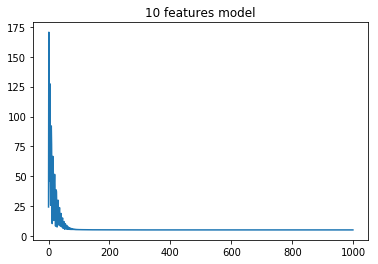

In [16]:
plt.figure()
plt.title("10 features model")
plt.plot([x for x in range(1000)],loss_list_2[:1000])

In [17]:
(35.610-23.940)/23.940

0.4874686716791979

## Generate test samples

In [18]:
test_set = pd.read_csv(DATA_PATH+"test.csv",encoding= ENCODING,header=None)

test_set = test_set.replace('NR', np.nan)
test_set = test_set.fillna(0)

test_set = test_set.iloc[:,2:]
test_set = test_set.astype(dtype=np.float32)

test_np = np.array(test_set)

for i in range(18):
    _min = test_np[i:4320:18,:].min()
    _max = test_np[i:4320:18,:].max()
    test_np[i:4320:18,:] = (test_np[i:4320:18,:]-_min)/(_max-_min)
        
        
test_x_0 = np.zeros([240,9*18])

for i in range(240):
    test_x_0[i] = test_np[i:i+18,:9].flatten()
    
test_x_5h = np.zeros([240,90])
for i in range(240):
    test_x_5h[i] = test_np[i:i+18,:5].flatten()
    
test_x_pm25 = np.array(test_set.iloc[9:4320:18,0:])
test_x_pm25_5h = np.array(test_set.iloc[9:4320:18,0:5])

## Predict

In [19]:
def predict(x,w,bias=True):
    if bias:
        x = np.concatenate((np.ones((x.shape[0], 1 )), x) , axis = 1).astype(float)
    y = x.dot(w)
    return y

In [20]:
y_predict_0 = predict(test_x_0,w_0)
y_predict_1 = predict(test_x_5h,w_1)
y_predict_2 = predict(test_x_pm25,w_2)
y_predict_3 = predict(test_x_pm25_5h,w_3)

## Result

### RMSE

In [21]:
def RMSE(predict,ans):
    return np.sqrt(np.mean((predict-ans)**2))

In [22]:
ans = pd.read_csv(DATA_PATH+"ans.csv",encoding= ENCODING)
_ans = np.array(ans.iloc[:,1])

In [33]:
RMSE(y_predict_0[:120],_ans[:120])

31.480766651210462

In [34]:
RMSE(y_predict_0[120:],_ans[120:])

37.88508169902331

In [35]:
RMSE(y_predict_1[:120],_ans[:120])

26.26324304086929

In [36]:
RMSE(y_predict_1[120:],_ans[120:])

33.55088434212575

In [37]:
RMSE(y_predict_2[:120],_ans[:120])

24.062696461665215

In [38]:
RMSE(y_predict_2[120:],_ans[120:])

35.788762556704526

In [39]:
RMSE(y_predict_3[120:],_ans[120:])

32.17979187805436

In [40]:
RMSE(y_predict_3[:120],_ans[:120])

22.32989289220954

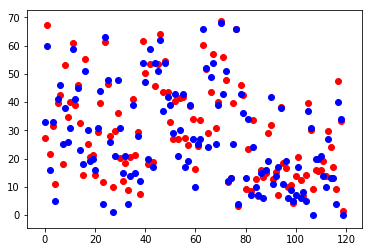

In [41]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter([i for i in range(120)],y_predict_2[:120],c='r')
plt.scatter([i for i in range(120)],_ans[:120],c='b')

In [32]:
abs(y_predict_0-_ans).mean()

26.962020156444634